# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model  import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Load the Dataset

In [2]:
data = pd.read_csv('titanic_dataset.csv')

In [3]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


# Determine if ANY Value in a Series is Missing

In [4]:
data.isnull().values.any()

True

In [5]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# Data Preprocessing

In [6]:
# Drop irrelevant features
data = data.drop(['PassengerId', 'Name', 'Cabin', 'Ticket'], axis=1)

In [7]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,0,3,male,NaN,0,0,8.0500,S
414,1,1,female,39.0,0,0,108.9000,C
415,0,3,male,38.5,0,0,7.2500,S
416,0,3,male,NaN,0,0,8.0500,S


In [8]:
data.isnull().sum()

Survived     0
Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [9]:
# Handle missing values
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Fare'].fillna(data['Fare'].mode()[0], inplace=True)

In [10]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

# Label Encoding

In [11]:
data.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
# Convert categorical features to numerical using Label Encoding
label_encoder = LabelEncoder()
data['Sex'] = label_encoder.fit_transform(data['Sex'])
data['Embarked'] = label_encoder.fit_transform(data['Embarked'])

In [14]:
data.dtypes

Survived      int64
Pclass        int64
Sex           int32
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int32
dtype: object

# Data Visualization

In [15]:
# Set the style for Seaborn plots
sns.set(style = "whitegrid")

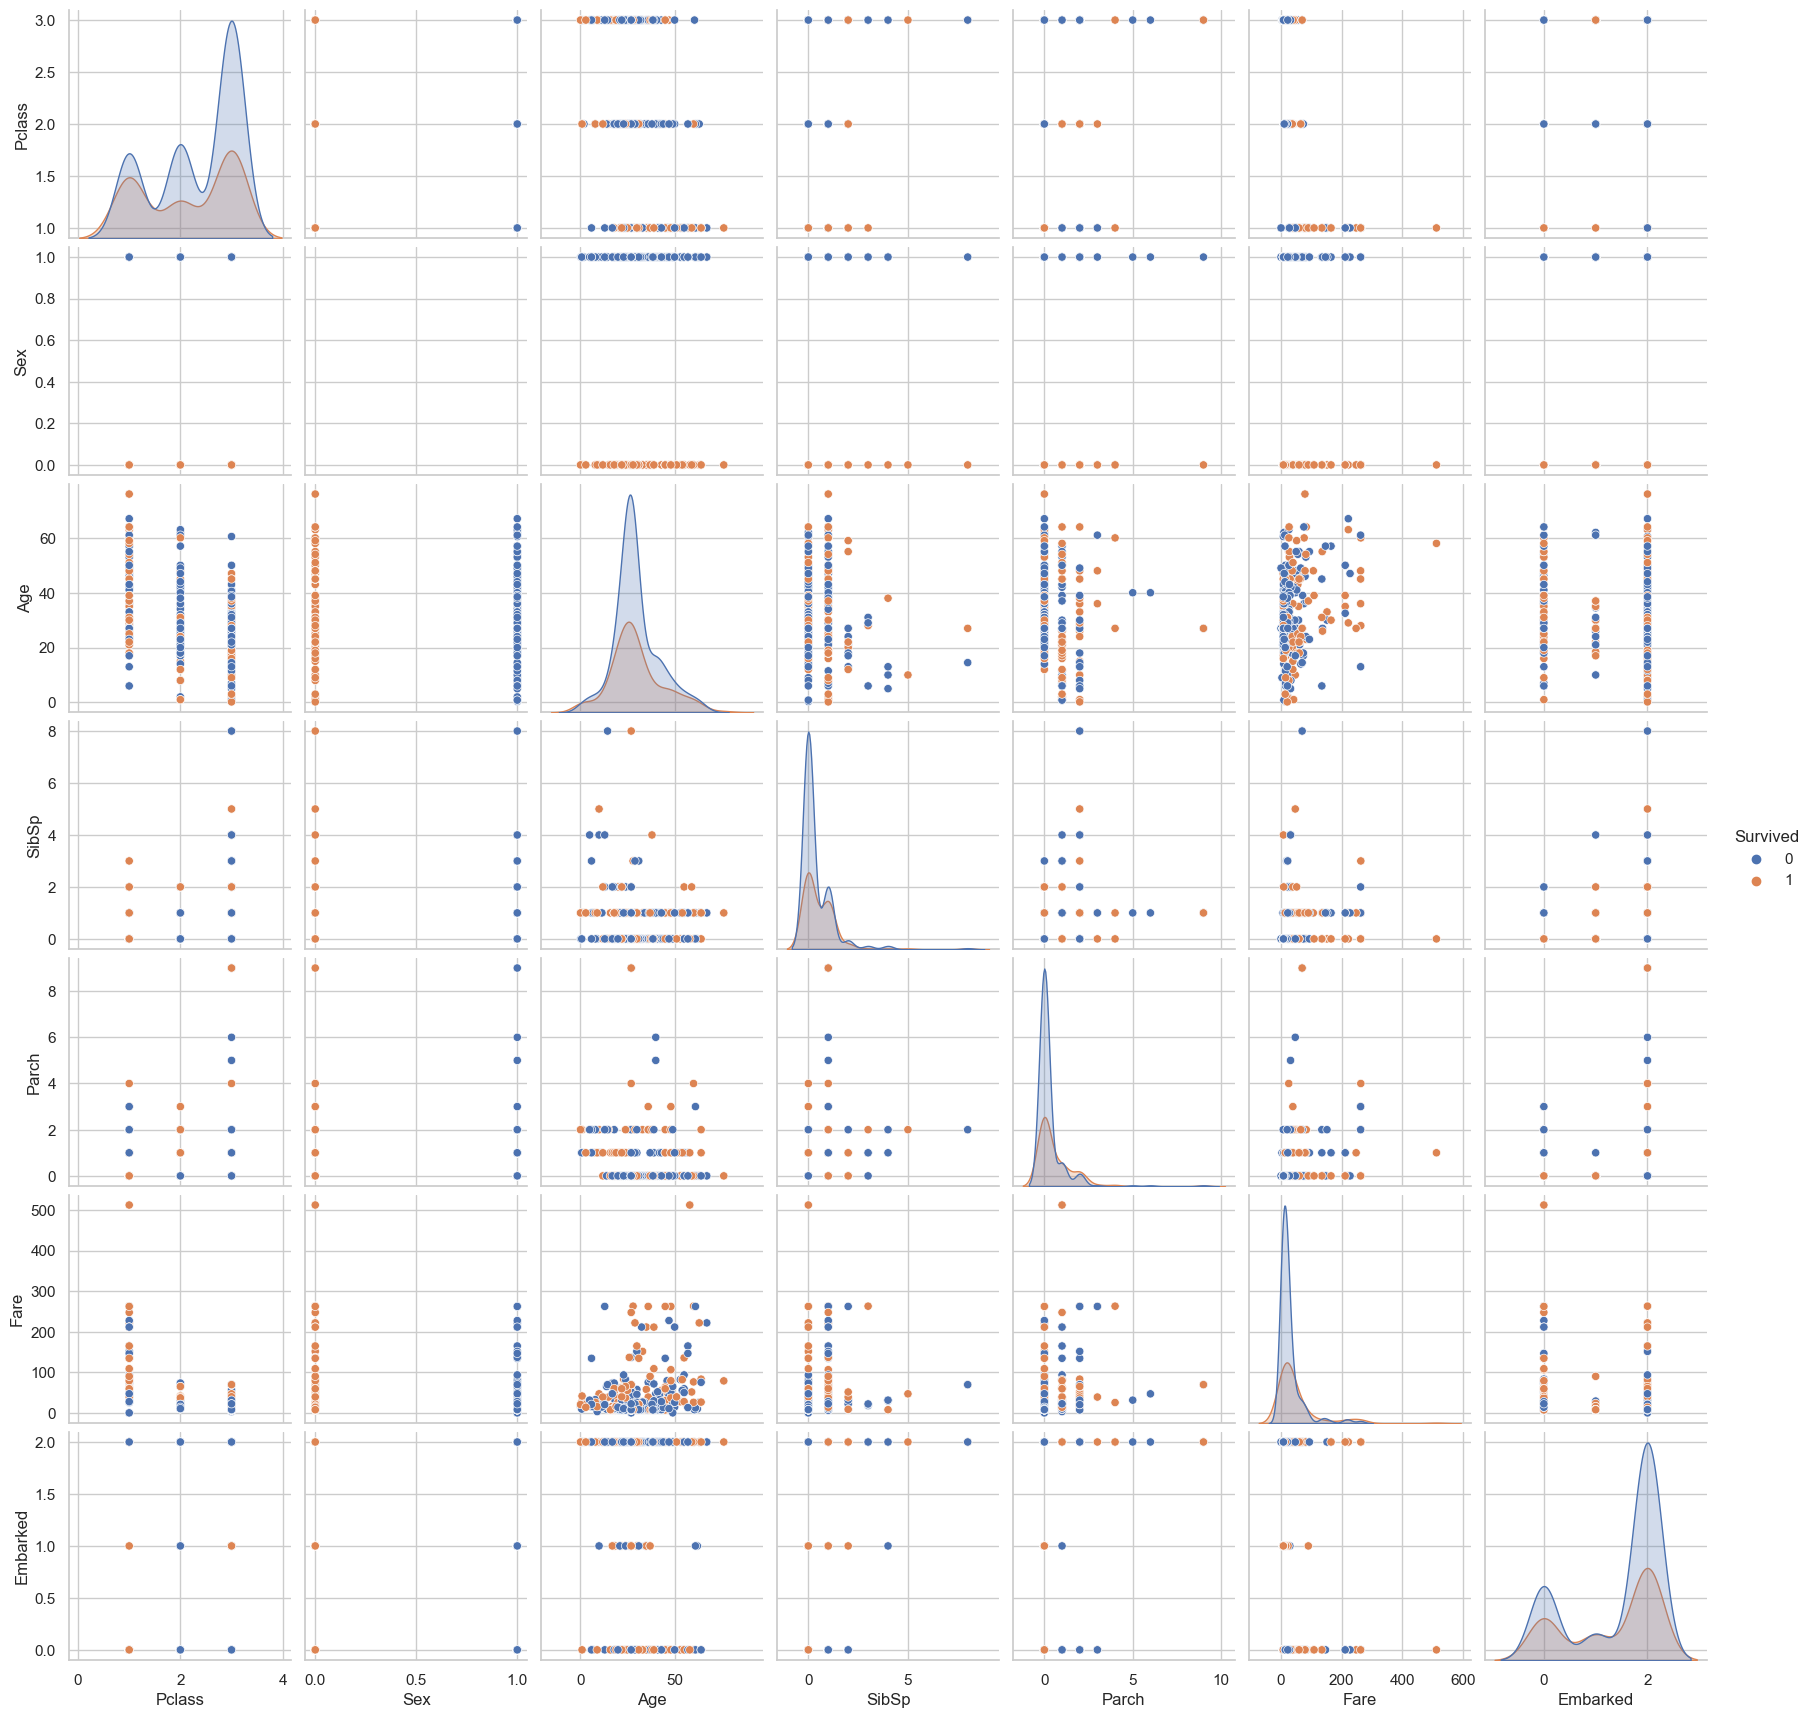

In [16]:
# Visualization: Pairplot to Visualize Relationships between Numeric Features
sns.pairplot(data, hue = 'Survived', diag_kind = 'kde')
plt.show()

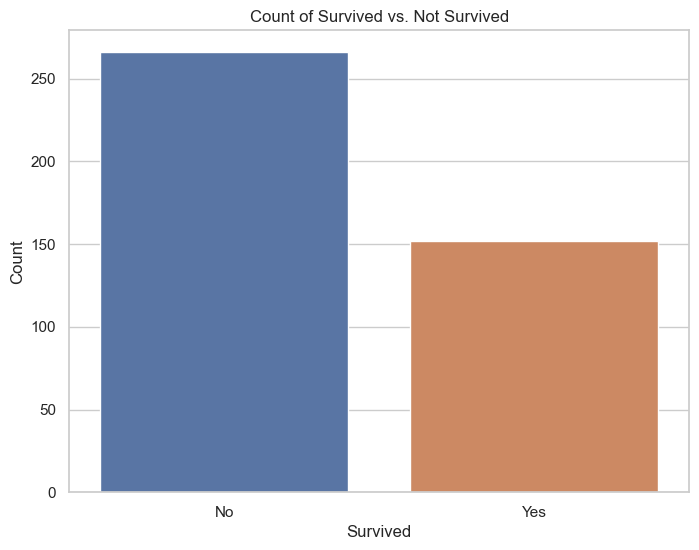

In [17]:
# Visualization 1: Count of Survived vs. Not Survived
plt.figure(figsize = (8, 6))
sns.countplot(x = 'Survived', data = data)
plt.title('Count of Survived vs. Not Survived')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

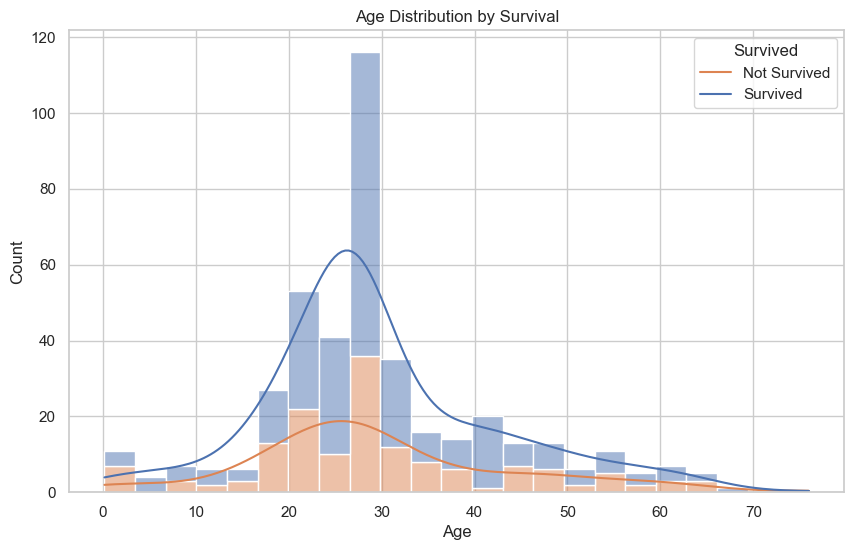

In [18]:
# Visualization 2: Age Distribution by Survival
plt.figure(figsize = (10, 6))
sns.histplot(data, x = 'Age', hue = 'Survived', multiple = 'stack', kde = True)
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title = 'Survived', labels = ['Not Survived', 'Survived'])
plt.show()

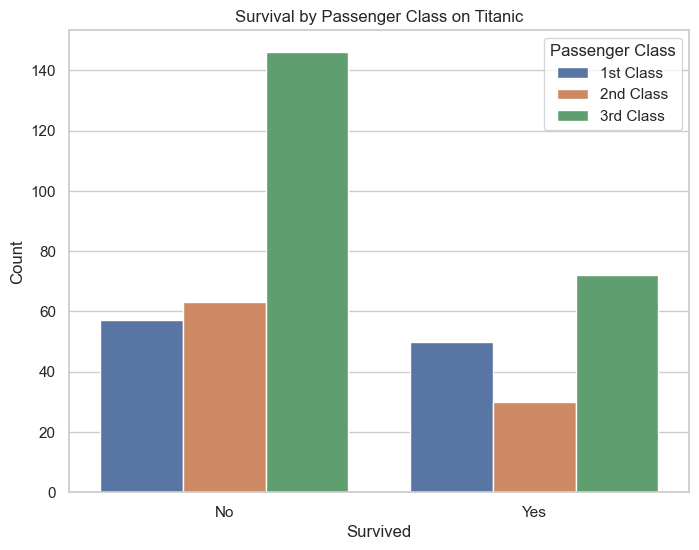

In [19]:
# Visualization 4: Passenger Class Distribution by Survival
plt.figure(figsize = (8, 6))
sns.countplot(x = 'Survived', hue = 'Pclass', data = data)
plt.title('Survival by Passenger Class on Titanic')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.legend(title = 'Passenger Class', labels = ['1st Class', '2nd Class', '3rd Class'])
plt.show()

# Features and Target

In [20]:
# Define features (X) and target (Y)
X = data.drop('Survived', axis=1)
Y = data['Survived']

# Training and Testing the Dataset

In [21]:
# Split the data into training and testing data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Logistic Regression Classifier

In [22]:
# Build a Logistic Regression model
model = LogisticRegression(random_state=42)

# Train the Model

In [23]:
# Train the model
model.fit(X_train, Y_train)

C:\Users\Microsoft\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

# Predictions on Test Data

In [24]:
# Make predictions on test data
predictions = model.predict(X_test)

# Evaluate the Model

# Accuracy of Logistic Regression Classifier on Test Data

In [25]:
# Calculate Accuracy
Accuracy = accuracy_score(Y_test, predictions)

In [26]:
print(f"Accuracy of Logistic Regression Classifier on Test Data: {Accuracy*100:.2f}")

Accuracy of Logistic Regression Classifier on Test Data: 100.00


# Classification Report of Logistic Regression Classifier

In [27]:
# Classification Report
Classification_Report = classification_report(Y_test, predictions)

In [28]:
print("Classification Report:\n", Classification_Report)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84

